In [1]:
import pandas as pd

In [2]:
import scipy as sp

In [3]:
from matplotlib import pyplot as plt

In [4]:
import numpy as np

In [5]:
import matplotlib as mpl

In [6]:
import datetime

In [7]:
biodiv = pd.read_csv('bcsee_plants_animals.csv',low_memory=False)

In [8]:
biodiv.head(1)

,Year,Scientific Name,Scientific Name Synonyms,English Name,English Name Synonyms,Species Code,Element Code,Global Status,Global Status Review Date,Prov Status,...,Presence,Breeding Bird,Endemic,CF Action Groups,CF Highest Priority,CF Priority Goal 1,CF Priority Goal 2,CF Priority Goal 3,CDC Maps,Mapping Status
0,2011,Abies amabilis,NaN,amabilis fir,NaN,ABIEAMA,PGPIN01010,G5,04/09/1997,S5,...,Regularly occurring,NaN,N,No New Actn,5,5,6,6,N,NaN


In [9]:
print(len(biodiv))

58485


In [10]:
list(biodiv.columns.values)

['Year',
 'Scientific Name',
 'Scientific Name Synonyms',
 'English Name',
 'English Name Synonyms',
 'Species Code',
 'Element Code',
 'Global Status',
 'Global Status Review Date',
 'Prov Status',
 'Prov Status Review Date',
 'Prov Status Change Date',
 'COSEWIC',
 'COSEWIC Comments',
 'BC List',
 'Identified Wildlife',
 'Prov Wildlife Act',
 'GOERT',
 'MBCA',
 'SARA',
 'SARA Comments',
 'General Status Canada',
 'CITES',
 'Name Category',
 'Class (English)',
 'Species Level',
 'Kingdom',
 'Phylum',
 'Class',
 'Order',
 'Family',
 'Forest Dist',
 'MOE Region',
 'Regional Dist',
 'Municipality',
 'BGC',
 'Habitat Subtype',
 'Origin',
 'Presence',
 'Breeding Bird',
 'Endemic',
 'CF Action Groups',
 'CF Highest Priority',
 'CF Priority Goal 1',
 'CF Priority Goal 2',
 'CF Priority Goal 3',
 'CDC Maps',
 'Mapping Status']

In [11]:
biodiv.rename(columns={'Name Category':'Cat','English Name':'EName','English Name Synonyms':'EName2','Scientific Name Synonyms':'Name2','Species Code':'SpeciesCode','BC List':'BC_List','Prov Status Review Date':'Date', 'Scientific Name':'Name', 'Class (English)':'ClassE'}, inplace = True)

In [12]:
print(biodiv['Kingdom'].unique())

['Plantae' 'Animalia' nan]


In [13]:
print(biodiv['BC_List'].unique())

['Yellow' 'Blue' 'Red' 'Exotic' 'No Status' 'Accidental' 'Unknown'
 'Extinct' 'Yelllow' 'YELLOW' '/' 'RED' nan]


In [14]:
biodiv.replace({'BC_List': {'Unknown':np.nan,'No Status':np.nan ,'/':np.nan,'Yelllow':'Yellow','YELLOW':'Yellow', 'Accidental':'Exotic', 'RED':'Red'}}, inplace = True)

In [15]:
biodiv['DateY'] = pd.DatetimeIndex(biodiv['Date']).year

In [16]:
def parse_values(y):
    if (1990<y and y<1999):
        return '1990-1999'
    elif (2000<y and y<2009):
        return '2000-2009'
    else:
        return '2010-2019'

biodiv['Year']=biodiv['DateY'].apply(parse_values)   

In [17]:
biodiv_plants= biodiv [['Kingdom','DateY','Order','Class','Phylum','ClassE','BC_List','Year','Family','SpeciesCode','Name','EName','EName2','Name2']]

In [18]:
biodiv_plants = biodiv_plants.loc[biodiv['Kingdom']=='Plantae']

In [19]:
print(biodiv_plants['Class'].unique())

['Pinopsida' 'Bryopsida' 'Dicotyledoneae' 'Monocotyledoneae' 'Ascomycetes'
 'Filicopsida' 'Andreaeopsida' 'Incertae sedis (Phylum: Ascomycota)'
 'Ophioglossopsida' 'Incertae sedis (Phylum: Mitosporic fungi)'
 'Lycopodiopsida' 'Equisetopsida' 'Isoetopsida' nan 'Sphagnopsida'
 'Haplomitriopsida' 'Jungermanniopsida' 'Anthocerotopsida'
 'Marchantiopsida' 'Takakiopsida']


In [20]:
biodiv_plants = biodiv_plants.replace({'Class': {'Dicotyledoneae': 'Dicots', 'Bryopsida': 'Non-vascular',
                                     'Monocotyledoneae':'Monocots','Filicopsida':'Ferns',
                                    'Andreaeopsida':'Non-vascular','Isoetopsida':'Fossil-Species',
                                   'Sphagnopsida' :'Fossil-Species','Lycopodiopsida':'Fossil-Species','Pinopsida':'Conifers',
                                    'Jungermanniopsida':'Non-vascular','Anthocerotopsida':'Non-vascular',
                                    'Marchantiopsida':'Non-vascular', 'Takakiopsida':'Non-vascular',
                                                 'Haplomitriopsida':'Non-vascular','Equisetopsida':'Non-vascular' }})

In [21]:
biodiv_plants = biodiv_plants[(biodiv_plants.Class != 'Ascomycetes') &
                  (biodiv_plants.Class != 'Incertae sedis (Phylum: Ascomycota)')&
                 (biodiv_plants.Class != 'Ophioglossopsida')&
                  (biodiv_plants.Class != 'Incertae sedis (Phylum: Mitosporic fungi)')]

In [22]:
null_columns=biodiv_plants.columns[biodiv_plants.isnull().any()]

biodiv_plants[null_columns].isnull().sum()


DateY           5014
Order             14
Class             14
Phylum            14
ClassE          6941
BC_List         1306
Family            14
SpeciesCode      926
EName           6816
EName2         29752
Name2          25888
dtype: int64

In [23]:
print(biodiv_plants[biodiv_plants['Class'].isnull()])

       Kingdom   DateY Order Class Phylum ClassE BC_List       Year Family  \
5500   Plantae  2010.0   NaN   NaN    NaN    NaN  Exotic  2010-2019    NaN   
11214  Plantae  2010.0   NaN   NaN    NaN    NaN     Red  2010-2019    NaN   
11870  Plantae  2012.0   NaN   NaN    NaN    NaN  Yellow  2010-2019    NaN   
12212  Plantae     NaN   NaN   NaN    NaN    NaN     NaN  2010-2019    NaN   
22478  Plantae     NaN   NaN   NaN    NaN    NaN     NaN  2010-2019    NaN   
22480  Plantae     NaN   NaN   NaN    NaN    NaN     NaN  2010-2019    NaN   
24507  Plantae  2014.0   NaN   NaN    NaN    NaN  Exotic  2010-2019    NaN   
27880  Plantae     NaN   NaN   NaN    NaN    NaN     NaN  2010-2019    NaN   
28259  Plantae  2001.0   NaN   NaN    NaN    NaN  Yellow  2000-2009    NaN   
30083  Plantae     NaN   NaN   NaN    NaN    NaN     NaN  2010-2019    NaN   
30085  Plantae     NaN   NaN   NaN    NaN    NaN     NaN  2010-2019    NaN   
32112  Plantae  2014.0   NaN   NaN    NaN    NaN  Exotic  2010-2

In [24]:
biodiv_plants = biodiv_plants.dropna(subset = ['DateY'])


In [25]:
print(biodiv_plants.loc[biodiv_plants['Name'] == 'Symphyotrichum lanceolatum var. hesperium'])

       Kingdom   DateY      Order   Class      Phylum  ClassE BC_List  \
28259  Plantae  2001.0        NaN     NaN         NaN     NaN  Yellow   
35864  Plantae  2001.0        NaN     NaN         NaN     NaN  Yellow   
44462  Plantae  2001.0  Asterales  Dicots  Anthophyta  dicots  Yellow   
57367  Plantae  2001.0  Asterales  Dicots  Anthophyta  dicots  Yellow   

            Year      Family SpeciesCode  \
28259  2000-2009         NaN    SYMPLAN1   
35864  2000-2009         NaN    SYMPLAN1   
44462  2000-2009  Asteraceae    SYMPLAN1   
57367  2000-2009  Asteraceae    SYMPLAN1   

                                            Name                 EName EName2  \
28259  Symphyotrichum lanceolatum var. hesperium  western willow aster    NaN   
35864  Symphyotrichum lanceolatum var. hesperium  western willow aster    NaN   
44462  Symphyotrichum lanceolatum var. hesperium  western willow aster    NaN   
57367  Symphyotrichum lanceolatum var. hesperium  western willow aster    NaN   

      N

In [26]:
biodiv_plants.loc[biodiv_plants['Name'] == 'Solidago altissima ssp. gilvocanescens', 'Class'] = 'Dicots'
biodiv_plants.loc[biodiv_plants['Name'] == 'Poteridium occidentale', 'Class'] = 'Dicots'
biodiv_plants.loc[biodiv_plants['Name'] == 'Helianthus pauciflorus ssp. pauciflorus', 'Class'] = 'Dicots'
biodiv_plants.loc[biodiv_plants['Name'] == 'Symphyotrichum lanceolatum var. hesperium', 'Class'] = 'Dicots'

In [27]:
biodiv_plants.dropna(subset =['Class'], inplace = True) # Peltigera gowardii is a lichen not a plant

In [28]:
biodiv_plants_red = biodiv_plants.loc[biodiv_plants['BC_List']== 'Red']

In [29]:
biodiv_plants = biodiv_plants.drop(columns = ['BC_List','Kingdom','DateY','Order','Phylum','SpeciesCode','Family','ClassE','EName','EName2','Name2'])
biodiv_plants_red = biodiv_plants_red.drop(columns = ['BC_List','Kingdom','DateY','Order','Phylum','SpeciesCode','Family','ClassE','EName','EName2','Name2'])

In [30]:
piv=biodiv_plants.pivot_table('Name', columns ='Class', index ='Year' , aggfunc = 'count', fill_value=0)
piv_red=biodiv_plants_red.pivot_table('Name', columns ='Class', index ='Year' , aggfunc = 'count', fill_value=0)

In [31]:
plants_crosstab = pd.crosstab(biodiv_plants['Year'], biodiv_plants['Class'],
                               margins = True)
plants_red_crosstab = pd.crosstab(biodiv_plants_red['Year'], biodiv_plants_red['Class'],
                               margins = True)

In [32]:
print(piv)
print(piv_red)

Class      Conifers  Dicots  Ferns  Fossil-Species  Monocots  Non-vascular
Year                                                                      
1990-1999         0      11      0               5         2             5
2000-2009        44    5646    232             123      1893            49
2010-2019       175    7262    216             415      3127          5600
Class      Conifers  Dicots  Ferns  Fossil-Species  Monocots  Non-vascular
Year                                                                      
1990-1999         0       4      0               0         0             3
2000-2009         0     451     36              17       137             0
2010-2019         4    1222     42              74       321           952


In [33]:
plants_crosstab

Class,Conifers,Dicots,Ferns,Fossil-Species,Monocots,Non-vascular,All
Year,,,,,,,
1990-1999,0,11,0,5,2,5,23
2000-2009,44,5646,232,123,1893,49,7987
2010-2019,175,7262,216,415,3127,5600,16795
All,219,12919,448,543,5022,5654,24805


In [34]:
plants_red_crosstab

Class,Conifers,Dicots,Ferns,Fossil-Species,Monocots,Non-vascular,All
Year,,,,,,,
1990-1999,0,4,0,0,0,3,7
2000-2009,0,451,36,17,137,0,641
2010-2019,4,1222,42,74,321,952,2615
All,4,1677,78,91,458,955,3263


In [35]:
percentage = pd.DataFrame({'Year': ['1990-1999','2000-2009','2010-2019','1990-1999','2000-2009','2010-2019',
                                    '1990-1999','2000-2009','2010-2019','1990-1999','2000-2009','2010-2019',
                                   '1990-1999','2000-2009','2010-2019','1990-1999','2000-2009','2010-2019'],
                           'Class':['Conifers','Conifers','Conifers','Dicots','Dicots','Dicots',
                                   'Ferns','Ferns','Ferns','Fossil-Species','Fossil-Species','Fossil-Species',
                                   'Monocots','Monocots','Monocots','Non-Vascular','Non-Vascular','Non-Vascular'],
                           'Percentage':[0,0,400/175,400/11, 45100/5646, 122200/7262,0,3600/232,4200/216,
                                         0,1700/123,7400/415,0,13700/1893,32100/3127,300/5,0,95200/5600]})
print(percentage)

         Year           Class  Percentage
0   1990-1999        Conifers    0.000000
1   2000-2009        Conifers    0.000000
2   2010-2019        Conifers    2.285714
3   1990-1999          Dicots   36.363636
4   2000-2009          Dicots    7.987956
5   2010-2019          Dicots   16.827320
6   1990-1999           Ferns    0.000000
7   2000-2009           Ferns   15.517241
8   2010-2019           Ferns   19.444444
9   1990-1999  Fossil-Species    0.000000
10  2000-2009  Fossil-Species   13.821138
11  2010-2019  Fossil-Species   17.831325
12  1990-1999        Monocots    0.000000
13  2000-2009        Monocots    7.237190
14  2010-2019        Monocots   10.265430
15  1990-1999    Non-Vascular   60.000000
16  2000-2009    Non-Vascular    0.000000
17  2010-2019    Non-Vascular   17.000000


In [36]:
piv_new=percentage.pivot_table('Percentage', columns ='Class', index ='Year' , aggfunc = 'sum', fill_value=0)
print(piv_new)


Class      Conifers     Dicots      Ferns  Fossil-Species  Monocots  \
Year                                                                  
1990-1999  0.000000  36.363636   0.000000        0.000000   0.00000   
2000-2009  0.000000   7.987956  15.517241       13.821138   7.23719   
2010-2019  2.285714  16.827320  19.444444       17.831325  10.26543   

Class      Non-Vascular  
Year                     
1990-1999            60  
2000-2009             0  
2010-2019            17  


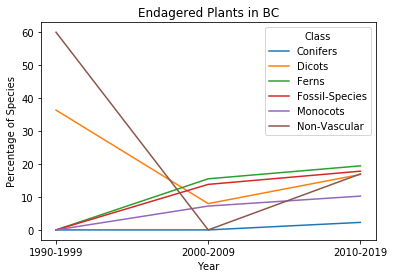

In [37]:
piv_new.plot()
plt.gca().set_xticks(range(len(piv_new)))
plt.gca().set_xticklabels(['1990-1999', '2000-2009', '2010-2019'])
plt.ylabel('Percentage of Species')
plt.title('Endagered Plants in BC')
plt.savefig('Endagered Plants in BC.png')

In [38]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(piv_new)
print(chi2)
print(pval) # p-value is lower than 0.05. We can reject the null hypothesis and say there is a 
            # statistically significant relationship between year and class.
print(dof)
print(expected)

121.01352605992768
3.1508691822049025e-21
10
[[ 0.98075684 26.25071623 15.00139921 13.58147441  7.51004365 33.03924603]
 [ 0.45355265 12.13968776  6.93742224  6.28077563  3.47303228 15.27905476]
 [ 0.8514048  22.78850874 13.02286437 11.79021348  6.51954384 28.68169921]]


In [39]:
from scipy.stats import chisquare
obs_year = np.array([[0, 0,2.3], [36.4,8,16.8],[0,15.5,19.4],[0,13.8,17.8],[0,7.2,10.2],[60,0,17]])
chisquare(obs_year)

Power_divergenceResult(statistic=array([210.13278008,  29.1894382 ,  15.21401198]), pvalue=array([1.92748712e-43, 2.12853293e-05, 9.48598822e-03]))

In [40]:
obs_class = np.array([[0,36.4,0,0,0,60],[0,8,15.5,13.8,7.2,0],[2.3,16.8,19.4,17.8,10.2,17]])
chisquare(obs_class)

Power_divergenceResult(statistic=array([ 4.6       , 20.72156863, 18.10372493, 16.55949367,  9.47586207,
       74.51948052]), pvalue=array([1.00258844e-01, 3.16496232e-05, 1.17172604e-04, 2.53601395e-04,
       8.75674486e-03, 6.58112907e-17]))